In [2]:
import os
import pandas as pd
import matplotlib
import numpy as np
import scipy.stats as st

os.getcwd()
os.chdir('C:\\Users\meric\Data Science Notes Works\codes')
os.listdir()
# dataset=pd.read_csv('USD_TRY.csv')

dataset=pd.read_excel('ALTIN_TRY.xlsx',sheet_name='Sheet1')

<AxesSubplot:xlabel='Tarih'>

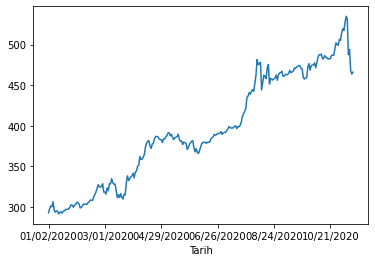

In [3]:
seri = pd.Series(dataset['Kur'].values, index= pd.to_datetime(dataset['Tarih']).dt.strftime('%m/%d/%Y'))
seri.plot()

In [38]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES
from statsmodels.tsa.api import  SimpleExpSmoothing, Holt
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.vector_ar.var_model import VAR

# df['Kur'].plot()
# plt.show()

df_train = seri.iloc[:-12]
df_test = seri.iloc[-12:]

ModelDict ={'Model':[],'Fitted':[]}

#döngüye sokucam
for i in range(2,25):    
    ModelDict["Model"].append(HWES(df_train,trend="add",seasonal_periods=i,seasonal="mul"))
    ModelDict["Fitted"].append(ModelDict["Model"][i-2].fit(optimized=True))

forecast1 = fitted1.forecast(steps=12)
    
# ModelPredictDict ={'Model':[],'Forecast':[]}    

# ModelPredictDict ={}

# for i in range(0,25): 


#     https://stackoverflow.com/questions/6667201/how-to-define-a-two-dimensional-array


    
    




{'Model': [<statsmodels.tsa.holtwinters.model.ExponentialSmoothing at 0x218b8f811c0>,
 'Fitted': [<statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x218b92ac0d0>,
  <statsmodels.tsa.holtwinters.results.HoltWintersResultsWrapper at 0x218b92fb580>]}

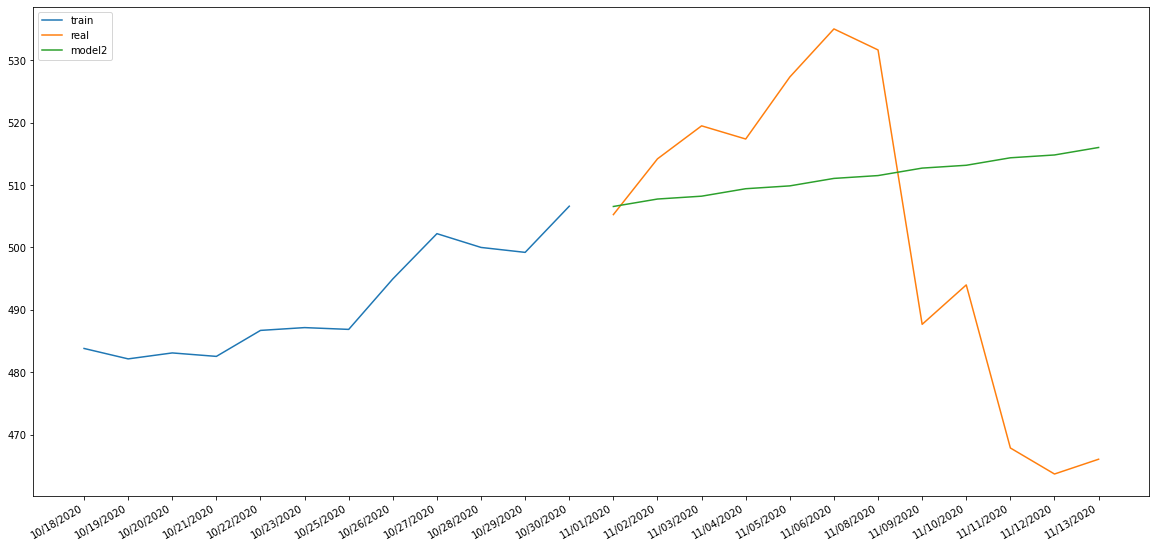

In [24]:
df_train_plot=df_train.iloc[-12:]


#Plotting multiple sets of data
plt.figure(figsize=(20,10))

plt.plot(df_train_plot.index,df_train_plot.values,label='train') # Setting up legends
plt.plot(df_test.index,df_test.values,label='real') # Setting up legends
plt.plot(df_test.index,forecast2.values,label='model2') # Setting up legends


# # plt.xlabel("X - Axis")
# # plt.ylabel("Y - Axis")

plt.legend(loc=2) #legend location : https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.legend.html
plt.gcf().autofmt_xdate() # x ekseni format düzenlemesi
plt.show()

In [9]:
df_main = pd.DataFrame({'Tarih':seri.index, 'Kur':seri.values})
df_forecast1=pd.DataFrame({'Tarih':df_test.index, 'Forecast1':forecast1.values})
df_forecast2=pd.DataFrame({'Tarih':df_test.index, 'Forecast2':forecast2.values})
df_forecast3=pd.DataFrame({'Tarih':df_test.index, 'Forecast3':forecast3.values})
df_forecast4=pd.DataFrame({'Tarih':df_test.index, 'Forecast4':forecast4.values})
df_forecast5=pd.DataFrame({'Tarih':df_test.index, 'Forecast5':forecast5.values})
df_forecast6=pd.DataFrame({'Tarih':df_test.index, 'Forecast6':forecast6.values})
df_forecast7=pd.DataFrame({'Tarih':df_test.index, 'Forecast7':forecast7.values})


df_total=pd.merge(df_main, pd.merge(df_forecast1, 
                                   pd.merge(df_forecast2, 
                                            pd.merge(df_forecast3, 
                                                     pd.merge(df_forecast4, 
                                                              pd.merge(df_forecast5, 
                                                                       pd.merge(df_forecast6, df_forecast7,
                                                                                on='Tarih', how='outer'),
                                                                       on='Tarih', how='outer'),
                                                              on='Tarih', how='outer'),
                                                     on='Tarih', how='outer'),
                                            on='Tarih', how='outer'), 
                                   on='Tarih', how='outer'), on='Tarih', how='left')



df_total.to_excel (r'export_dataframe_altın.xlsx', index = False, header=True)

df_total

,Tarih,Kur,Forecast1,Forecast2,Forecast3,Forecast4,Forecast5,Forecast6,Forecast7
0,01/02/2020,292.842,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01/03/2020,297.960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01/05/2020,301.218,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01/06/2020,300.177,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01/07/2020,306.494,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
266,11/09/2020,487.689,512.654020,506.22297,514.446966,423.965516,464.381154,464.481163,464.481163
267,11/10/2020,494.000,513.478930,506.22297,515.503733,432.538193,468.401046,468.505332,468.505332
268,11/11/2020,467.898,514.303839,506.22297,516.562671,421.495572,464.994375,465.095806,465.095806
269,11/12/2020,463.730,515.128749,506.22297,517.623784,433.111647,466.641801,466.743431,466.743431
